In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pydicom 

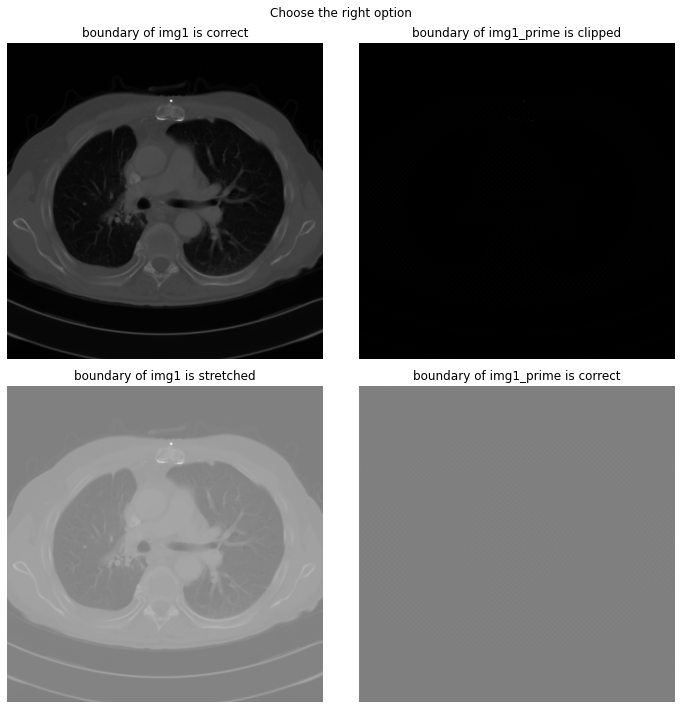

In [8]:
# read dicom files
img1 = pydicom.dcmread("Thoracic_CT1.dcm").pixel_array
img2 = pydicom.dcmread("Thoracic_CT2.dcm").pixel_array

bit_depth = 12 
L_1 = 2**12-1 # calcualate L-1

mask = np.fromfunction(lambda i, j: (-1)**(i+j), img1.shape, dtype=int) #?

img1_prime = img1 * mask
img2_prime = img2 * mask

fig, axs = plt.subplots(2, 2, figsize=(10,10))
plt.suptitle('Choose the right option')

# axs[0, 0].set_title('boundary of img1 is (correct/clipped/stretched)')
axs[0, 0].set_title('boundary of img1 is correct')
axs[0, 0].imshow(img1, cmap='gray', vmin=0, vmax=L_1)
axs[0, 0].axis(False)

axs[1, 0].set_title('boundary of img1 is stretched')
axs[1, 0].imshow(img1, cmap='gray', vmin=-L_1, vmax=L_1)
axs[1, 0].axis(False)

axs[0, 1].set_title('boundary of img1_prime is clipped')
axs[0, 1].imshow(img1_prime, cmap='gray', vmin=0, vmax=L_1)
axs[0, 1].axis(False)

axs[1, 1].set_title('boundary of img1_prime is correct')
axs[1, 1].imshow(img1_prime, cmap='gray', vmin=-L_1, vmax=L_1)
axs[1, 1].axis(False)

plt.tight_layout()
plt.show()

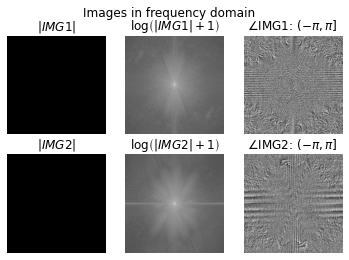

In [9]:
IMG1 = np.fft.fft2(img1_prime)
IMG1_abs = np.abs(IMG1)
IMG1_abs_log = np.log(IMG1_abs+1)
IMG1_angle = np.angle(IMG1)

IMG2 = np.fft.fft2(img2_prime)
IMG2_abs = np.abs(IMG2)
IMG2_abs_log = np.log(IMG2_abs+1)
IMG2_angle = np.angle(IMG2)

maxI = img1.size*L_1 #?
maxI_log = np.log(maxI+1)

plt.figure() #?
plt.suptitle('Images in frequency domain')

plt.subplot(231)
plt.title(r'${\left| {{IMG1}} \right|}$')
plt.imshow(IMG1_abs, cmap='gray', vmin=0, vmax=maxI)
plt.axis(False)

plt.subplot(232)
plt.title(r'$\log \left( {\left| {{IMG1}} \right| + 1} \right)$')
plt.imshow(IMG1_abs_log, cmap='gray', vmin=0, vmax=maxI_log)
plt.axis(False)


plt.subplot(233)
plt.title(r'$\angle$IMG1: $\left( { - \pi ,\pi } \right]$')
plt.imshow(IMG1_angle, cmap='gray', vmin=-np.pi, vmax=np.pi)
plt.axis(False)

plt.subplot(234)
plt.title(r'${\left| {{IMG2}} \right|}$')
plt.imshow(IMG2_abs, cmap='gray', vmin=0, vmax=maxI)
plt.axis(False)

plt.subplot(235)
plt.title(r'$\log \left( {\left| {{IMG2}} \right| + 1} \right)$')
plt.imshow(IMG2_abs_log, cmap='gray', vmin=0, vmax=maxI_log)
plt.axis(False)

plt.subplot(236)
plt.title(r'$\angle$IMG2: $\left( { - \pi ,\pi } \right]$')
plt.imshow(IMG2_angle, cmap='gray', vmin=-np.pi, vmax=np.pi)
plt.axis(False)

plt.show()

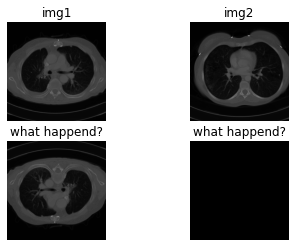

In [11]:
IMG1_c =  np.conj(IMG1)
IMG2_c = -np.conj(IMG2) #?

img1_c_shifted = np.fft.ifft2(IMG1_c).real
img2_c_shifted = np.fft.ifft2(IMG2_c).real

img1_c = np.clip(img1_c_shifted * mask, 0, L_1) 
img2_c = np.clip(img2_c_shifted * mask, 0, L_1)

plt.figure() #?

plt.subplot(221)
plt.title('img1')
plt.imshow(img1, cmap='gray', vmin=0, vmax=L_1)
plt.axis(False)

plt.subplot(222)
plt.title('img2')
plt.imshow(img2, cmap='gray', vmin=0, vmax=L_1)
plt.axis(False)

plt.subplot(223)
plt.title('what happend?') 
plt.imshow(img1_c, cmap='gray', vmin=0, vmax=L_1)
plt.axis(False)

plt.subplot(224)
plt.title('what happend?')
plt.imshow(img2_c, cmap='gray', vmin=0, vmax=L_1)
plt.axis(False)

plt.show()

In [13]:
img2_c.min()

4.973799150320701e-13